# GANs (Generative Adversarial Networks)

## Abstract

Our objective is to learn how to implement Generative Adversarial Networks(GANs) using Keras and TensorFlow. We will be implementing on Fashion MNIST dataset.

**Objective**
1. Discuss Generative Adversarial Networks
2. Implement GAN architecture using Keras and Tensorflow
3. Train Fashion MNIST dataset
4. Generate fake/synthetic apparel images

## Introduction

GANs are made up of two components -

**Generator** - generates new data instances

**Discriminator** - tries to distinguish the generated or fake data from the real dataset.

Discriminative algorithms try to classify input data; that is, given the features of an instance of data, they predict a label or category to which that data belongs. So discriminative algorithms map features to labels. They are concerned solely with that correlation.One the other way,loosely speaking,generative algorithms do the opposite. Instead of predicting a label given certain features, they attempt to predict features given a certain label.

While training they both start together from scratch and the generator learn to shape the random distribition through the training epochs.

**Generative Adversarial Networks** can be used to generate synthetic (i.e., fake) images that are perceptually near identical to their ground-truth authentic originals.

<Img src="https://github.com/rhnyewale/INFO-7390-Advance-Data-Science-Architecture/blob/master/Mini_Project3-GAN/Images/GANs.jpg?raw=true">

In order to generate synthetic images, we make use of two neural networks during training:

1. A generator that accepts an input vector of randomly generated noise and produces an output “imitation” image that looks similar, if not identical, to the authentic image
2. A discriminator or adversary that attempts to determine if a given image is an “authentic” or “fake”

By training these networks at the same time, one giving feedback to the other, we can learn to generate synthetic images.

## General GAN training procedure

<Img src="https://github.com/rhnyewale/INFO-7390-Advance-Data-Science-Architecture/blob/master/Mini_Project3-GAN/Images/GANs_Training%20.jpg?raw=true">
    
    
**Step 1** we randomly generate a vector (i.e., noise). We pass this noise through our generator,
    
**Step 2** which generates an actual image in **Step 2**
    
**Step 3** We then sample authentic images from our training set and mix them with our synthetic images

**Step 4** next step is to train our discriminator using this mixed set. The goal of the discriminator is to correctly label each image as “real” or “fake.”

**Step 5** Next, we’ll once again generate random noise, but this time we’ll purposely label each noise vector as a “real image” 

**Step 6** We’ll then train the GAN using the noise vectors and “real image” labels even though they are not actual real images
    
    
**The reason this process works is due to the following:**

1. We have frozen the weights of the discriminator at this stage, implying that the discriminator is not learning when we update the weights of the generator.
    <br/><br/>
2. We’re trying to “fool” the discriminator into being unable to determine which images are real vs. synthetic. The feedback from the discriminator will allow the generator to learn how to produce more authentic images.

# Training the Network

The important thing about training a GAN is that the two components should never be trained together.<br/> Rather the network is trained in two different phases

1. The first phase is for training the discriminator and updating the weights appropriately
2. In the next step the generator is trained while the discriminator training is disabled.

**Phase 1** During phase one of training the generator is fed random data(in the form of a distribution) as noise. The generator creates some random images which are given to the discriminator. The discriminator also takes input from dataset of real images. The discriminator learns to distinguish the real data from the fake ones by learning or assessing features from it's inputs. The discriminator outputs some probability and difference between the predicted results and the actual results are backpropagated through the network and the weights of the discriminator is updated. Remember during this phase, the backpropagation stops at the end of the discriminator and the generator is not trained or updated.

**Phase 2** In this phase, the generator produced batch of images are directly given as input to the discriminator. The real images are not given this time to the discriminator. The generator learns by tricking the discriminator into it outputting false positives. The discriminator outputs probabilities which are assessed against the actual results and the weights of of the generator are updated through backpropagation. Remember here during backpropagation, the discriminator weights should not be updated and kept as they were before.

<Img src="https://github.com/rhnyewale/INFO-7390-Advance-Data-Science-Architecture/blob/master/Mini_Project3-GAN/Images/GANs_Training2.jpg?raw=true">

# Loss Function of GAN

The **generator** tries to **minimize** the following function while<br/>
the **discriminator** tries to **maximize** it:

<Img src="https://github.com/rhnyewale/INFO-7390-Advance-Data-Science-Architecture/blob/master/Mini_Project3-GAN/Images/Loss_Function.jpg?raw=true">


In this function:

* D(x) is the discriminator's estimate of the probability that real data instance x is real
* Ex is the expected value over all real data instances
* G(z) is the generator's output when given noise z
* D(G(z)) is the discriminator's estimate of the probability that a fake instance is real
* Ez is the expected value over all random inputs to the generator (in effect, the expected value over all generated fake instances G(z))


The generator can't directly affect the log(D(x)) term in the function, so, for the generator, minimizing the loss is equivalent to minimizing log(1 - D(G(z))).

# Guidelines for Stable GAN architecture according to Radford paper.

https://arxiv.org/abs/1511.06434<br/>

* Replace any pooling layers with strided convolutions 
* Use batch normalization in both the generator and discriminator
* Remove fully-connected layers in deeper networks
* Use ReLU in the generator except for the final layer, which will utilize tanh
* Use Leaky ReLU in the discriminator

#  Recommendations on training GANs by Francois Chollet

* Sample random vectors from a normal distribution (i.e., Gaussian distribution) rather than a uniform distribution
* Add dropout to the discriminator
* Add noise to the class labels when training the discriminator
* To reduce checkerboard pixel artifacts in the output image, use a kernel size that is divisible by the stride when utilizing convolution or transposed convolution in both the generator and discriminator
* If your adversarial loss rises dramatically while your discriminator loss falls to zero, try reducing the learning rate of the discriminator and increasing the dropout of the discriminator

We’ll be using some of the techniques suggested by both Radford et al. and Chollet, but not all of them.

# Application of GANs

* Generate Examples for Image Datasets
* Generate Photographs of Human Faces
* Generate Realistic Photographs
* Image-to-Image Translation
* Text-to-Image Translation
* Semantic-Image-to-Photo Translation
* Photos to Emojis
* Face Aging
* Super Resolution
* 3D Object Generation

### Install the necessary packages

In [ ]:
!pip install tensorflow==2.2.0

     |████████████████████████████████| 516.2MB 33kB/s 
     |████████████████████████████████| 460kB 46.2MB/s 
     |████████████████████████████████| 3.0MB 49.4MB/s 
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0


### Import Packages

In [1]:
# import the necessary packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import fashion_mnist
from matplotlib import pyplot as plt
from imutils import build_montages
from sklearn.utils import shuffle
import numpy as np
import argparse
import cv2
import os

### Function to display images in Jupyter Notebooks and Google Colab

In [2]:
def plt_imshow(title, image):
  # convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image, aspect="auto")
	plt.title(title)
	plt.grid(False)
	plt.show()

**Transposed convolutional layers**, sometimes referred to as **fractionally-strided convolution** or (incorrectly) **deconvolution**, are used when we need a transform going in the opposite direction of a normal convolution.

The generator of our GAN will accept an N dimensional input vector (i.e., a list of numbers, but a volume like an image) and then transform the N dimensional vector into an output image.

This process implies that we need to reshape and then upscale this vector into a volume as it passes through the network — to accomplish this reshaping and upscaling, we’ll need transposed convolution.

**Transposed convolution** as the method to:

1. Accept an input volume from a previous layer in the network
2. Produce an output volume that is larger than the input volume
3. Maintain a connectivity pattern between the input and output

In essence our transposed convolution layer will reconstruct our target spatial resolution and perform a normal convolution operation, utilizing fancy zero-padding techniques to ensure our output spatial dimensions are met.

### Implementing our “generator” and “discriminator” with Keras and TensorFlow

Here we define the build_generator function inside DCGAN.
The build_generator accepts a number of arguments.

* dim: The target spatial dimensions (width and height) of the generator after reshaping
* depth: The target depth of the volume after reshaping
* channels: The number of channels in the output volume from the generator (i.e., 1 for grayscale images and 3 for RGB images)
* inputDim: Dimensionality of the randomly generated input vector to the generator
* outputDim: Dimensionality of the output fully-connected layer from the randomly generated input vector

In [3]:
class DCGAN:
	@staticmethod
	def build_generator(dim, depth, channels=1, inputDim=100,
		outputDim=512):
		# initialize the model along with the input shape to be
		# "channels last" and the channels dimension itself
		model = Sequential()
		inputShape = (dim, dim, depth)
		chanDim = -1

        # first set of FC => RELU => BN layers
		model.add(Dense(input_dim=inputDim, units=outputDim))
		model.add(Activation("relu"))
		model.add(BatchNormalization())

		# second set of FC => RELU => BN layers, this time preparing
		# the number of FC nodes to be reshaped into a volume
		model.add(Dense(dim * dim * depth))
		model.add(Activation("relu"))
		model.add(BatchNormalization())
  
  		# reshape the output of the previous layer set, upsample +
		# apply a transposed convolution, RELU, and BN
		model.add(Reshape(inputShape))
		model.add(Conv2DTranspose(32, (5, 5), strides=(2, 2),
			padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
  
  		# apply another upsample and transposed convolution, but
		# this time output the TANH activation
		model.add(Conv2DTranspose(channels, (5, 5), strides=(2, 2),
			padding="same"))
		model.add(Activation("tanh"))

		# return the generator model
		return model

# While the generator is intended to create synthetic images,
# the discriminator is used to classify whether any given input image is real or fake.

	@staticmethod
	def build_discriminator(width, height, depth, alpha=0.2):
		# initialize the model along with the input shape to be
		# "channels last"
		model = Sequential()
		inputShape = (height, width, depth)

		# first set of CONV => RELU layers
		model.add(Conv2D(32, (5, 5), padding="same", strides=(2, 2),
			input_shape=inputShape))
		model.add(LeakyReLU(alpha=alpha))

		# second set of CONV => RELU layers
		model.add(Conv2D(64, (5, 5), padding="same", strides=(2, 2)))
		model.add(LeakyReLU(alpha=alpha))

		# first (and only) set of FC => RELU layers
		model.add(Flatten())
		model.add(Dense(512))
		model.add(LeakyReLU(alpha=alpha))

		# sigmoid layer outputting a single value
		model.add(Dense(1))
		model.add(Activation("sigmoid"))
  
    # All activation layers utilize a Leaky ReLU activation to stabilize training,
    # except for the final activation function which is sigmoid.
    # We use a sigmoid here to capture the probability of whether the input image is real or synthetic.

		# return the discriminator model
		return model

### Implementing our GAN training script

In [4]:
# parsing code with *hard coded* arguments and values
args = {
	"output": "output",
	"epochs": 50,
	"batch_size": 128
}

In [5]:
# store the epochs and batch size in convenience variables, then
# initialize our learning rate
NUM_EPOCHS = args["epochs"]
BATCH_SIZE = args["batch_size"]
INIT_LR = 2e-4

## Loading Fashion MNIST dataset
Class labels can be ignored here, since we do not need them — we are only interested in the actual pixel data.

Furthermore, there is no concept of a “test set” for GANs. Our goal when training a GAN isn’t minimal loss or high accuracy. Instead, we seek an equilibrium between the generator and the discriminator.

To help us obtain this equilibrium, we combine both the training and testing images to give us additional training data.

In [6]:
# load the Fashion MNIST dataset and stack the training and testing
# data points so we have additional training data
print("[INFO] loading MNIST dataset...")
((trainX, _), (testX, _)) = fashion_mnist.load_data()
trainImages = np.concatenate([trainX, testX]) #To equilibrium, combine both the training and testing images to give additional training data.

# add in an extra dimension for the channel and scale the images
# into the range [-1, 1] (which is the range of the tanh
# function)
trainImages = np.expand_dims(trainImages, axis=-1)
trainImages = (trainImages.astype("float") - 127.5) / 127.5

[INFO] loading MNIST dataset...


In [7]:
# build the generator
print("[INFO] building generator...")
gen = DCGAN.build_generator(7, 64, channels=1)


[INFO] building generator...


In [8]:
gen.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               51712     
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dense_1 (Dense)              (None, 3136)              1608768   
_________________________________________________________________
activation_1 (Activation)    (None, 3136)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 3136)              12544     
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 64)          0

First, our model will accept an input vector that is 100-d, then transform it to a 512-d vector via an FC layer.

We then add a second FC layer, this one with 7x7x64 = 3,136 nodes. We reshape these 3,136 nodes into a 3D volume with shape 7×7 = 64 — this reshaping is only possible since our previous FC layer matches the number of nodes in the reshaped volume.

Applying a transposed convolution with a 2×2 stride increases our spatial dimensions from 7×7 to 14×14.

A second transposed convolution (again, with a stride of 2×2) increases our spatial dimension resolution from 14×14 to 28×18 with a single channel, which is the exact dimensions of our input images in the Fashion MNIST dataset.

When implementing your own GANs, make sure the spatial dimensions of the output volume match the spatial dimensions of your input images.

In [9]:
# build the discriminator
print("[INFO] building discriminator...")
disc = DCGAN.build_discriminator(28, 28, 1)
discOpt = Adam(lr=INIT_LR, beta_1=0.5, decay=INIT_LR / NUM_EPOCHS)
disc.compile(loss="binary_crossentropy", optimizer=discOpt)

[INFO] building discriminator...


We are using **binary cross-entropy** here, as our **discriminator** has a **sigmoid activation** function that will return a probability indicating whether the input image is real vs. fake. Since there are only two “class labels” (real vs. synthetic), we use binary cross-entropy.

The learning rate and beta value for the Adam optimizer were experimentally tuned. Lower learning rate and beta value for the Adam optimizer improves GAN training on the Fashion MNIST dataset. Applying learning rate decay helps stabilize training as well.

In [11]:
# build the adversarial model by first setting the discriminator to
# *not* be trainable, then combine the generator and discriminator
# together
print("[INFO] building GAN...")
disc.trainable = False  # first we need to freeze the discriminator weights before we combine the models to form our GAN
ganInput = Input(shape=(100,))
ganOutput = disc(gen(ganInput))
gan = Model(ganInput, ganOutput)

# compile the GAN
ganOpt = Adam(lr=INIT_LR, beta_1=0.5, decay=INIT_LR / NUM_EPOCHS)
gan.compile(loss="binary_crossentropy", optimizer=discOpt)

[INFO] building GAN...


The input to the gan will take a random vector that is 100-d. This value will be passed through the generator first, the output of which will go to the discriminator.

The discriminator weights are frozen at this point so the feedback from the discriminator will enable the generator to learn how to generate better synthetic images.

In [12]:
# randomly generate some benchmark noise so we can consistently
# visualize how the generative modeling is learning
print("[INFO] starting training...")
benchmarkNoise = np.random.uniform(-1, 1, size=(256, 100))
#benchmarkNoise is generated from a uniform distribution in the range [-1, 1], the same range as our tanh activation function
#size(256,100) indicates that we'll be generating 256 synthetic images, where each input starts as a 100-d vector

# loop over the epochs
for epoch in range(0, NUM_EPOCHS):
	# show epoch information and compute the number of batches per
	# epoch
	print("[INFO] starting epoch {} of {}...".format(epoch + 1,
		NUM_EPOCHS))
	batchesPerEpoch = int(trainImages.shape[0] / BATCH_SIZE)

	# loop over the batches
	for i in range(0, batchesPerEpoch):
		# initialize an (empty) output path
		p = None

		# select the next batch of images, then randomly generate
		# noise for the generator to predict on
		imageBatch = trainImages[i * BATCH_SIZE:(i + 1) * BATCH_SIZE]
		noise = np.random.uniform(-1, 1, size=(BATCH_SIZE, 100))

		# generate images using the noise + generator model
		genImages = gen.predict(noise, verbose=0)

		# concatenate the *actual* images and the *generated* images,
		# construct class labels for the discriminator, and shuffle
		# the data
		X = np.concatenate((imageBatch, genImages))
		y = ([1] * BATCH_SIZE) + ([0] * BATCH_SIZE)
		y = np.reshape(y, (-1,))
		(X, y) = shuffle(X, y)

		# train the discriminator on the data
		discLoss = disc.train_on_batch(X, y)
  
		# let's now train our generator via the adversarial model by
		# (1) generating random noise and (2) training the generator
		# with the discriminator weights frozen
		noise = np.random.uniform(-1, 1, (BATCH_SIZE, 100))
		fakeLabels = [1] * BATCH_SIZE
		fakeLabels = np.reshape(fakeLabels, (-1,))
		ganLoss = gan.train_on_batch(noise, fakeLabels)

		# check to see if this is the end of an epoch, and if so,
		# initialize the output path
		if i == batchesPerEpoch - 1:
			p = [args["output"], "epoch_{}_output.png".format(
				str(epoch + 1).zfill(4))]

		# otherwise, check to see if we should visualize the current
		# batch for the epoch
		else:
			# create more visualizations early in the training
			# process
			if epoch < 10 and i % 25 == 0:
				p = [args["output"], "epoch_{}_step_{}.png".format(
					str(epoch + 1).zfill(4), str(i).zfill(5))]

			# visualizations later in the training process are less
			# interesting
			elif epoch >= 10 and i % 100 == 0:
				p = [args["output"], "epoch_{}_step_{}.png".format(
					str(epoch + 1).zfill(4), str(i).zfill(5))]

		# check to see if we should visualize the output of the
		# generator model on our benchmark data
		if p is not None:
			# show loss information
			print("[INFO] Step {}_{}: discriminator_loss={:.6f}, "
				"adversarial_loss={:.6f}".format(epoch + 1, i,
					discLoss, ganLoss))

			# make predictions on the benchmark noise, scale it back
			# to the range [0, 255], and generate the montage
			images = gen.predict(benchmarkNoise)
			images = ((images * 127.5) + 127.5).astype("uint8")
			images = np.repeat(images, 3, axis=-1)
			vis = build_montages(images, (28, 28), (16, 16))[0]

			# write the visualization to disk
			p = os.path.sep.join(p)
			cv2.imwrite(p, vis)

[INFO] starting training...
[INFO] starting epoch 1 of 50...
[INFO] Step 1_0: discriminator_loss=0.668885, adversarial_loss=0.604357
[INFO] Step 1_25: discriminator_loss=0.051128, adversarial_loss=0.013817
[INFO] Step 1_50: discriminator_loss=0.001259, adversarial_loss=0.001632
[INFO] Step 1_75: discriminator_loss=0.000278, adversarial_loss=0.000908
[INFO] Step 1_100: discriminator_loss=0.000243, adversarial_loss=0.000630
[INFO] Step 1_125: discriminator_loss=0.000101, adversarial_loss=0.000551
[INFO] Step 1_150: discriminator_loss=0.000095, adversarial_loss=0.000543
[INFO] Step 1_175: discriminator_loss=0.000116, adversarial_loss=0.000666
[INFO] Step 1_200: discriminator_loss=0.491206, adversarial_loss=2.001959
[INFO] Step 1_225: discriminator_loss=0.220951, adversarial_loss=1.456180
[INFO] Step 1_250: discriminator_loss=0.148771, adversarial_loss=0.927086
[INFO] Step 1_275: discriminator_loss=0.410820, adversarial_loss=1.481503
[INFO] Step 1_300: discriminator_loss=0.505232, adversar

[INFO] Step 5_425: discriminator_loss=0.604155, adversarial_loss=0.859655
[INFO] Step 5_450: discriminator_loss=0.582513, adversarial_loss=0.792268
[INFO] Step 5_475: discriminator_loss=0.606517, adversarial_loss=1.187435
[INFO] Step 5_500: discriminator_loss=0.579715, adversarial_loss=1.042211
[INFO] Step 5_525: discriminator_loss=0.602324, adversarial_loss=0.861135
[INFO] Step 5_545: discriminator_loss=0.625389, adversarial_loss=0.958833
[INFO] starting epoch 6 of 50...
[INFO] Step 6_0: discriminator_loss=0.593894, adversarial_loss=0.890013
[INFO] Step 6_25: discriminator_loss=0.594222, adversarial_loss=0.763941
[INFO] Step 6_50: discriminator_loss=0.599901, adversarial_loss=1.090828
[INFO] Step 6_75: discriminator_loss=0.563655, adversarial_loss=1.106184
[INFO] Step 6_100: discriminator_loss=0.573153, adversarial_loss=1.128868
[INFO] Step 6_125: discriminator_loss=0.590729, adversarial_loss=1.080555
[INFO] Step 6_150: discriminator_loss=0.612913, adversarial_loss=1.001954
[INFO] Ste

[INFO] Step 10_275: discriminator_loss=0.606969, adversarial_loss=0.688335
[INFO] Step 10_300: discriminator_loss=0.618077, adversarial_loss=0.993620
[INFO] Step 10_325: discriminator_loss=0.616919, adversarial_loss=0.864476
[INFO] Step 10_350: discriminator_loss=0.584936, adversarial_loss=0.975852
[INFO] Step 10_375: discriminator_loss=0.639566, adversarial_loss=1.192515
[INFO] Step 10_400: discriminator_loss=0.639463, adversarial_loss=0.738843
[INFO] Step 10_425: discriminator_loss=0.627759, adversarial_loss=0.972014
[INFO] Step 10_450: discriminator_loss=0.593631, adversarial_loss=0.852903
[INFO] Step 10_475: discriminator_loss=0.662817, adversarial_loss=0.592883
[INFO] Step 10_500: discriminator_loss=0.593388, adversarial_loss=0.790583
[INFO] Step 10_525: discriminator_loss=0.624774, adversarial_loss=0.648338
[INFO] Step 10_545: discriminator_loss=0.606713, adversarial_loss=0.974958
[INFO] starting epoch 11 of 50...
[INFO] Step 11_0: discriminator_loss=0.614073, adversarial_loss=0.

[INFO] Step 24_100: discriminator_loss=0.637182, adversarial_loss=1.080103
[INFO] Step 24_200: discriminator_loss=0.573014, adversarial_loss=1.110240
[INFO] Step 24_300: discriminator_loss=0.587665, adversarial_loss=1.115744
[INFO] Step 24_400: discriminator_loss=0.633474, adversarial_loss=0.761960
[INFO] Step 24_500: discriminator_loss=0.617607, adversarial_loss=0.866088
[INFO] Step 24_545: discriminator_loss=0.571701, adversarial_loss=0.829364
[INFO] starting epoch 25 of 50...
[INFO] Step 25_0: discriminator_loss=0.606977, adversarial_loss=1.061254
[INFO] Step 25_100: discriminator_loss=0.600457, adversarial_loss=1.095674
[INFO] Step 25_200: discriminator_loss=0.608500, adversarial_loss=1.156889
[INFO] Step 25_300: discriminator_loss=0.581861, adversarial_loss=0.761468
[INFO] Step 25_400: discriminator_loss=0.583110, adversarial_loss=0.733467
[INFO] Step 25_500: discriminator_loss=0.605846, adversarial_loss=0.722403
[INFO] Step 25_545: discriminator_loss=0.561037, adversarial_loss=0.

[INFO] starting epoch 39 of 50...
[INFO] Step 39_0: discriminator_loss=0.549538, adversarial_loss=0.922231
[INFO] Step 39_100: discriminator_loss=0.533823, adversarial_loss=1.347607
[INFO] Step 39_200: discriminator_loss=0.558353, adversarial_loss=1.277843
[INFO] Step 39_300: discriminator_loss=0.517183, adversarial_loss=0.944617
[INFO] Step 39_400: discriminator_loss=0.569209, adversarial_loss=1.089113
[INFO] Step 39_500: discriminator_loss=0.563680, adversarial_loss=0.978939
[INFO] Step 39_545: discriminator_loss=0.527096, adversarial_loss=1.067444
[INFO] starting epoch 40 of 50...
[INFO] Step 40_0: discriminator_loss=0.547200, adversarial_loss=1.038602
[INFO] Step 40_100: discriminator_loss=0.526621, adversarial_loss=1.323462
[INFO] Step 40_200: discriminator_loss=0.535312, adversarial_loss=1.001610
[INFO] Step 40_300: discriminator_loss=0.521524, adversarial_loss=1.224245
[INFO] Step 40_400: discriminator_loss=0.576231, adversarial_loss=1.040427
[INFO] Step 40_500: discriminator_lo

### Visualizing our results

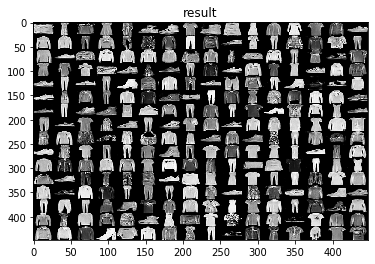

In [13]:
# define path to our final epoch results
filename = "epoch_{}_output.png".format(str(args["epochs"]).zfill(4))
resultPath = os.path.join(args["output"], filename)

# load the result image and display it
image = cv2.imread(resultPath)
plt_imshow("result", image)

# Hyperparameter Tuning in GAN

* Batch size: Experiment with values of 8, 16, 32, 54, or 128 for the batch size.
* The number of epochs: Experiment with 100 epochs and gradually increase it to 1,000-5,000.
* Learning rate: This is the most important hyperparameter. Experiment with 0.1, 0.001, 0.0001, and other small learning rates.
* Activation functions in different layers of the generator and the discriminator network: Experiment with sigmoid, tanh, ReLU, LeakyReLU, ELU, SeLU, and other activation functions.
* The optimization algorithm: Experiment with Adam, SGD, Adadelta, RMSProp, and other optimizers available in the Keras framework.
* Loss functions: Binary cross entropy is the loss function best suited for a 3D-GAN.



# Conclusion

Using our DCGAN implementation, we trained both the generator and discriminator on the Fashion MNIST dataset, resulting in output images of fashion items that:

1. Are not part of the training set and are complete synthetic
2. Look nearly identical to and indistinguishable from any image in the Fashion MNIST dataset

GANs are notoriously hard to train is due to the evolving loss landscape — with every step, our loss landscape changes slightly and is thus ever-evolving.


# Citation

https://arxiv.org/abs/1406.2661 <br/>
https://towardsdatascience.com/understanding-generative-adversarial-networks-gans-cd6e4651a29 <br/>
https://www.geeksforgeeks.org/generative-adversarial-network-gan/ <br/>
https://naokishibuya.medium.com/up-sampling-with-transposed-convolution-9ae4f2df52d0<br/>


# License

Copyright 2020 Rohan Subhash Yewale

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.